# Main Notebook


## Imports


### Adds src folder to path


In [1]:
import sys
import os

# Add the directory `src` containing python code
sys.path.append(os.path.abspath("../src"))

In [2]:
# autoreload
%load_ext autoreload
%autoreload 2

### Import common libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Load data


In [4]:
col_to_drop = [
    "Alley",
    "Utilities",
    "LandSlope",
    "MSSubClass",
    "OpenPorchSF",
    "BsmtHalfBath",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "MiscVal",
    "MoSold",
    "LowQualFinSF",
    "EnclosedPorch",
    "GrLivArea",
    "3SsnPorch",
]

In [5]:
# load data
data = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("../data/house-prices-advanced-regression-techniques/test.csv")

In [6]:
data.select_dtypes(include="int64").sample(5).T

,1429,572,793,1159,227
Id,1430,573,794,1160,228
MSSubClass,20,60,20,60,160
LotArea,12546,13159,9158,9120,1869
OverallQual,6,7,8,6,6
OverallCond,7,5,5,6,6
YearBuilt,1981,2009,2007,1974,1970
YearRemodAdd,1981,2009,2007,1974,1970
BsmtFinSF1,678,0,0,442,321
BsmtFinSF2,0,0,0,0,0
BsmtUnfSF,762,846,1496,459,162


In [7]:
data[data["TotalBsmtSF"] > data["1stFlrSF"]].select_dtypes(include="int64").T

,41,126,153,246,269,271,279,313,332,364,...,1169,1191,1264,1287,1298,1301,1335,1364,1398,1403
Id,42,127,154,247,270,272,280,314,333,365,...,1170,1192,1265,1288,1299,1302,1336,1365,1399,1404
MSSubClass,20,120,20,190,20,20,60,20,20,60,...,60,160,120,20,60,70,20,160,50,20
LotArea,16905,4928,13500,9142,7917,39104,10005,215245,10655,18800,...,35760,2645,4060,36500,63887,7500,9650,3180,7200,15256
OverallQual,5,6,6,6,6,7,7,7,8,6,...,10,8,6,5,10,6,6,7,5,8
OverallCond,6,5,7,8,7,7,5,5,5,5,...,5,5,5,5,5,7,5,5,4,5
YearBuilt,1959,1976,1960,1910,1976,1954,1977,1965,2003,1976,...,1995,1999,1998,1964,2008,1942,1977,2005,1950,2007
YearRemodAdd,1959,1976,1975,1950,1976,2005,1977,1965,2004,1976,...,1996,2000,1999,1964,2008,1950,1977,2005,1982,2007
BsmtFinSF1,967,120,429,0,751,226,392,1236,1124,712,...,1387,0,266,812,5644,547,686,0,180,929
BsmtFinSF2,0,0,1080,0,0,1063,0,820,479,0,...,0,0,0,0,0,0,0,0,352,0
BsmtUnfSF,383,958,93,1020,392,96,768,80,1603,84,...,543,776,1139,812,466,224,664,600,676,556


In [8]:
# data.set_index("Id", inplace=True)
data.drop(inplace=True, columns=["Id"])
# test_data.dropna(inplace=True)

# drop columns
data = data.drop(columns=col_to_drop)

data.sample(10)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,WoodDeckSF,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice
354,RL,60.0,8400,Pave,Reg,Bnk,Inside,SWISU,Norm,Norm,...,0,0,0,NaN,NaN,NaN,2006,WD,Normal,140000
1074,RL,74.0,8556,Pave,Reg,Lvl,Inside,CollgCr,Norm,Norm,...,140,0,0,NaN,NaN,NaN,2007,WD,Normal,194000
162,RL,95.0,12182,Pave,Reg,Lvl,Corner,NridgHt,Norm,Norm,...,0,0,0,NaN,NaN,NaN,2010,New,Partial,220000
710,RL,56.0,4130,Pave,IR1,Lvl,Inside,BrkSide,Norm,Norm,...,0,0,0,NaN,NaN,NaN,2008,WD,Normal,52000
3,RL,60.0,9550,Pave,IR1,Lvl,Corner,Crawfor,Norm,Norm,...,0,0,0,NaN,NaN,NaN,2006,WD,Abnorml,140000
997,RL,NaN,11717,Pave,IR1,Lvl,Inside,NWAmes,PosA,Norm,...,371,0,0,NaN,NaN,NaN,2009,WD,Normal,185000
440,RL,105.0,15431,Pave,Reg,Lvl,Inside,NridgHt,Norm,Norm,...,0,170,0,NaN,NaN,NaN,2009,WD,Normal,555000
578,FV,34.0,3604,Pave,Reg,Lvl,Corner,Somerst,Norm,Norm,...,0,0,0,NaN,NaN,NaN,2008,WD,Abnorml,146000
1442,FV,85.0,11003,Pave,Reg,Lvl,Inside,Somerst,Norm,Norm,...,168,0,0,NaN,NaN,NaN,2009,WD,Normal,310000
704,RL,70.0,8400,Pave,Reg,Lvl,Inside,CollgCr,Norm,Norm,...,0,0,0,NaN,NaN,NaN,2010,WD,Normal,213000


In [9]:
# Only normal sales
data = data[data["SaleCondition"] == "Normal"]
data.sample(1)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,WoodDeckSF,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice
247,RL,75.0,11310,Pave,Reg,Lvl,Inside,NAmes,Norm,Norm,...,0,0,0,NaN,NaN,NaN,2006,WD,Normal,140000


In [10]:
# use np.where to pick the first floor size

data["BaseFloorSF"] = np.where(
    data["TotalBsmtSF"] > data["1stFlrSF"],
    data["TotalBsmtSF"],
    data["1stFlrSF"],
)
data = data.drop(columns=["TotalBsmtSF", "1stFlrSF"])

In [11]:
# use np.where to create a new column using conditional logic

data["SaleAge"] = np.where(
    data["YearBuilt"] > data["YearRemodAdd"],
    data["YrSold"] - data["YearBuilt"],
    data["YrSold"] - data["YearRemodAdd"],
)
data = data.drop(columns=["YearBuilt", "YearRemodAdd", "YrSold"])

In [12]:
# # Only MSZoning with  Residential Low Density
# data = data[data["MSZoning"] == "RL" ]
# data.sample(1)

In [13]:
# Only aim for house 500k or bellow
data = data[data["SalePrice"] <= 560000]
data.sample(1)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,BaseFloorSF,SaleAge
1416,RM,60.0,11340,Pave,Reg,Lvl,Inside,OldTown,Norm,Norm,...,0,0,NaN,NaN,NaN,WD,Normal,122500,1246,60


MSZoning
RL         953
RM         189
FV          39
RH          11
C (all)      4
Name: count, dtype: int64


<Axes: >

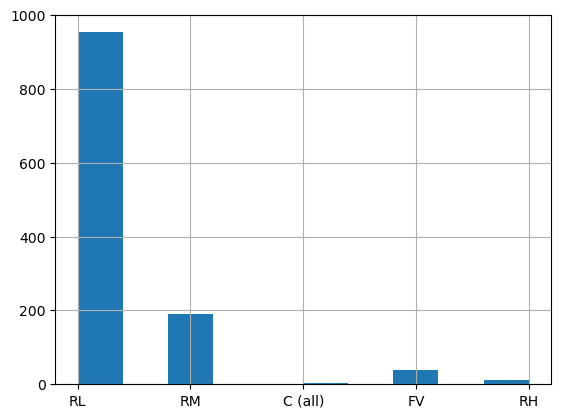

In [14]:
col = "MSZoning"
print(data[col].value_counts(dropna=False))
data[col].hist()

In [15]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Explorer the dat


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1196 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1196 non-null   object 
 1   LotFrontage    959 non-null    float64
 2   LotArea        1196 non-null   int64  
 3   Street         1196 non-null   object 
 4   LotShape       1196 non-null   object 
 5   LandContour    1196 non-null   object 
 6   LotConfig      1196 non-null   object 
 7   Neighborhood   1196 non-null   object 
 8   Condition1     1196 non-null   object 
 9   Condition2     1196 non-null   object 
 10  BldgType       1196 non-null   object 
 11  HouseStyle     1196 non-null   object 
 12  OverallQual    1196 non-null   int64  
 13  OverallCond    1196 non-null   int64  
 14  RoofStyle      1196 non-null   object 
 15  RoofMatl       1196 non-null   object 
 16  Exterior1st    1196 non-null   object 
 17  Exterior2nd    1196 non-null   object 
 18  MasVnrType   

In [17]:
# sale price

data["SalePrice"].describe().T

count      1196.000000
mean     174341.353679
std       66458.779962
min       39300.000000
25%      130000.000000
50%      160000.000000
75%      205000.000000
max      555000.000000
Name: SalePrice, dtype: float64

In [18]:
data

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,BaseFloorSF,SaleAge
0,RL,65.0,8450,Pave,Reg,Lvl,Inside,CollgCr,Norm,Norm,...,0,0,NaN,NaN,NaN,WD,Normal,208500,856,5
1,RL,80.0,9600,Pave,Reg,Lvl,FR2,Veenker,Feedr,Norm,...,0,0,NaN,NaN,NaN,WD,Normal,181500,1262,31
2,RL,68.0,11250,Pave,IR1,Lvl,Inside,CollgCr,Norm,Norm,...,0,0,NaN,NaN,NaN,WD,Normal,223500,920,6
4,RL,84.0,14260,Pave,IR1,Lvl,FR2,NoRidge,Norm,Norm,...,0,0,NaN,NaN,NaN,WD,Normal,250000,1145,8
5,RL,85.0,14115,Pave,IR1,Lvl,Inside,Mitchel,Norm,Norm,...,0,0,NaN,MnPrv,Shed,WD,Normal,143000,796,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,Reg,Lvl,Inside,Gilbert,Norm,Norm,...,0,0,NaN,NaN,NaN,WD,Normal,175000,953,7
1456,RL,85.0,13175,Pave,Reg,Lvl,Inside,NWAmes,Norm,Norm,...,0,0,NaN,MnPrv,NaN,WD,Normal,210000,2073,22
1457,RL,66.0,9042,Pave,Reg,Lvl,Inside,Crawfor,Norm,Norm,...,0,0,NaN,GdPrv,Shed,WD,Normal,266500,1188,4
1458,RL,68.0,9717,Pave,Reg,Lvl,Inside,NAmes,Norm,Norm,...,0,0,NaN,NaN,NaN,WD,Normal,142125,1078,14


In [19]:
data[data["SalePrice"] > 550000]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,BaseFloorSF,SaleAge
440,RL,105.0,15431,Pave,Reg,Lvl,Inside,NridgHt,Norm,Norm,...,170,0,NaN,NaN,NaN,WD,Normal,555000,3094,1


<Axes: xlabel='SalePrice', ylabel='Count'>

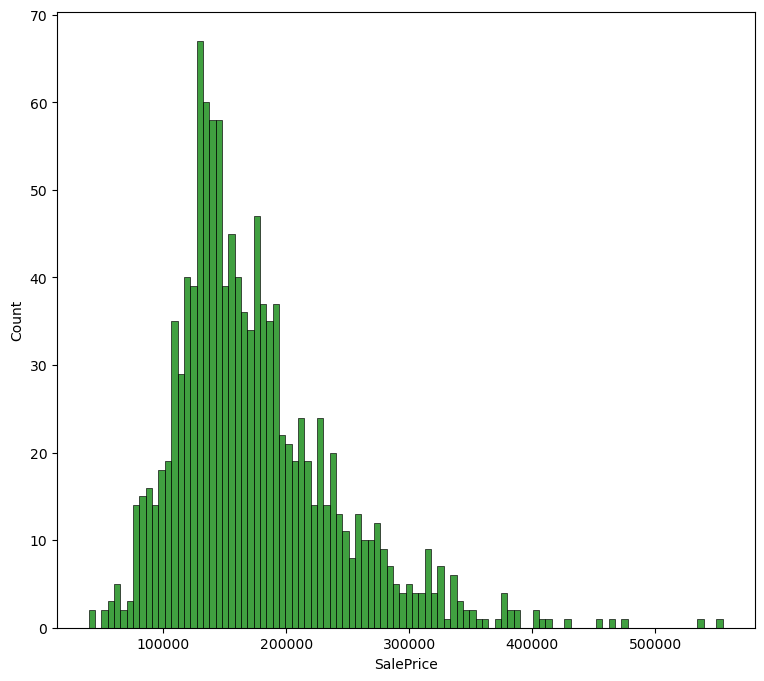

In [20]:
plt.figure(figsize=(9, 8))
sns.histplot(data=data, x="SalePrice", color="g", bins=100, kde_kws={"alpha": 0.4})

In [21]:
from data_proccessing_util import get_df_info


get_df_info(data)

Shape:  (1196, 62) 

Columns:  ['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'SalePrice', 'BaseFloorSF', 'SaleAge'] 

Categorical columns:  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 

In [22]:
# sns.pairplot(data.sample(100))

In [23]:
# find categories

len(data.dtypes.to_list())

62

### Numerical featues


In [24]:
num_data = data.select_dtypes(include=["int64"])
num_columns = num_data.columns.to_list()
num_columns.remove("SalePrice")

print(num_columns)
num_data.sample(2).T

['LotArea', 'OverallQual', 'OverallCond', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'BaseFloorSF', 'SaleAge']


,234,1175
LotArea,7851,10678
OverallQual,6,8
OverallCond,5,5
2ndFlrSF,1100,743
BsmtFullBath,1,0
FullBath,2,2
HalfBath,1,1
BedroomAbvGr,4,4
KitchenAbvGr,1,1
TotRmsAbvGrd,8,9


In [25]:
# log_num_data =  num_data["area"].apply(lambda x: np.log(x))

# log_num_data.hist(figsize=(8,8), bins=50, xlabelsize=8, ylabelsize=8)
# num_data["area"] = log_num_data # uncomment to use the log of the area instead of the area data

array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': '2ndFlrSF'}>],
       [<Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageCars'}>],
       [<Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'ScreenPorch'}>,
        <Axes: title={'center': 'PoolArea'}>],
       [<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'BaseFloorSF'}>,
        <Axes: title={'center': 'SaleAge'}>, <Axes: >]], dtype=object)

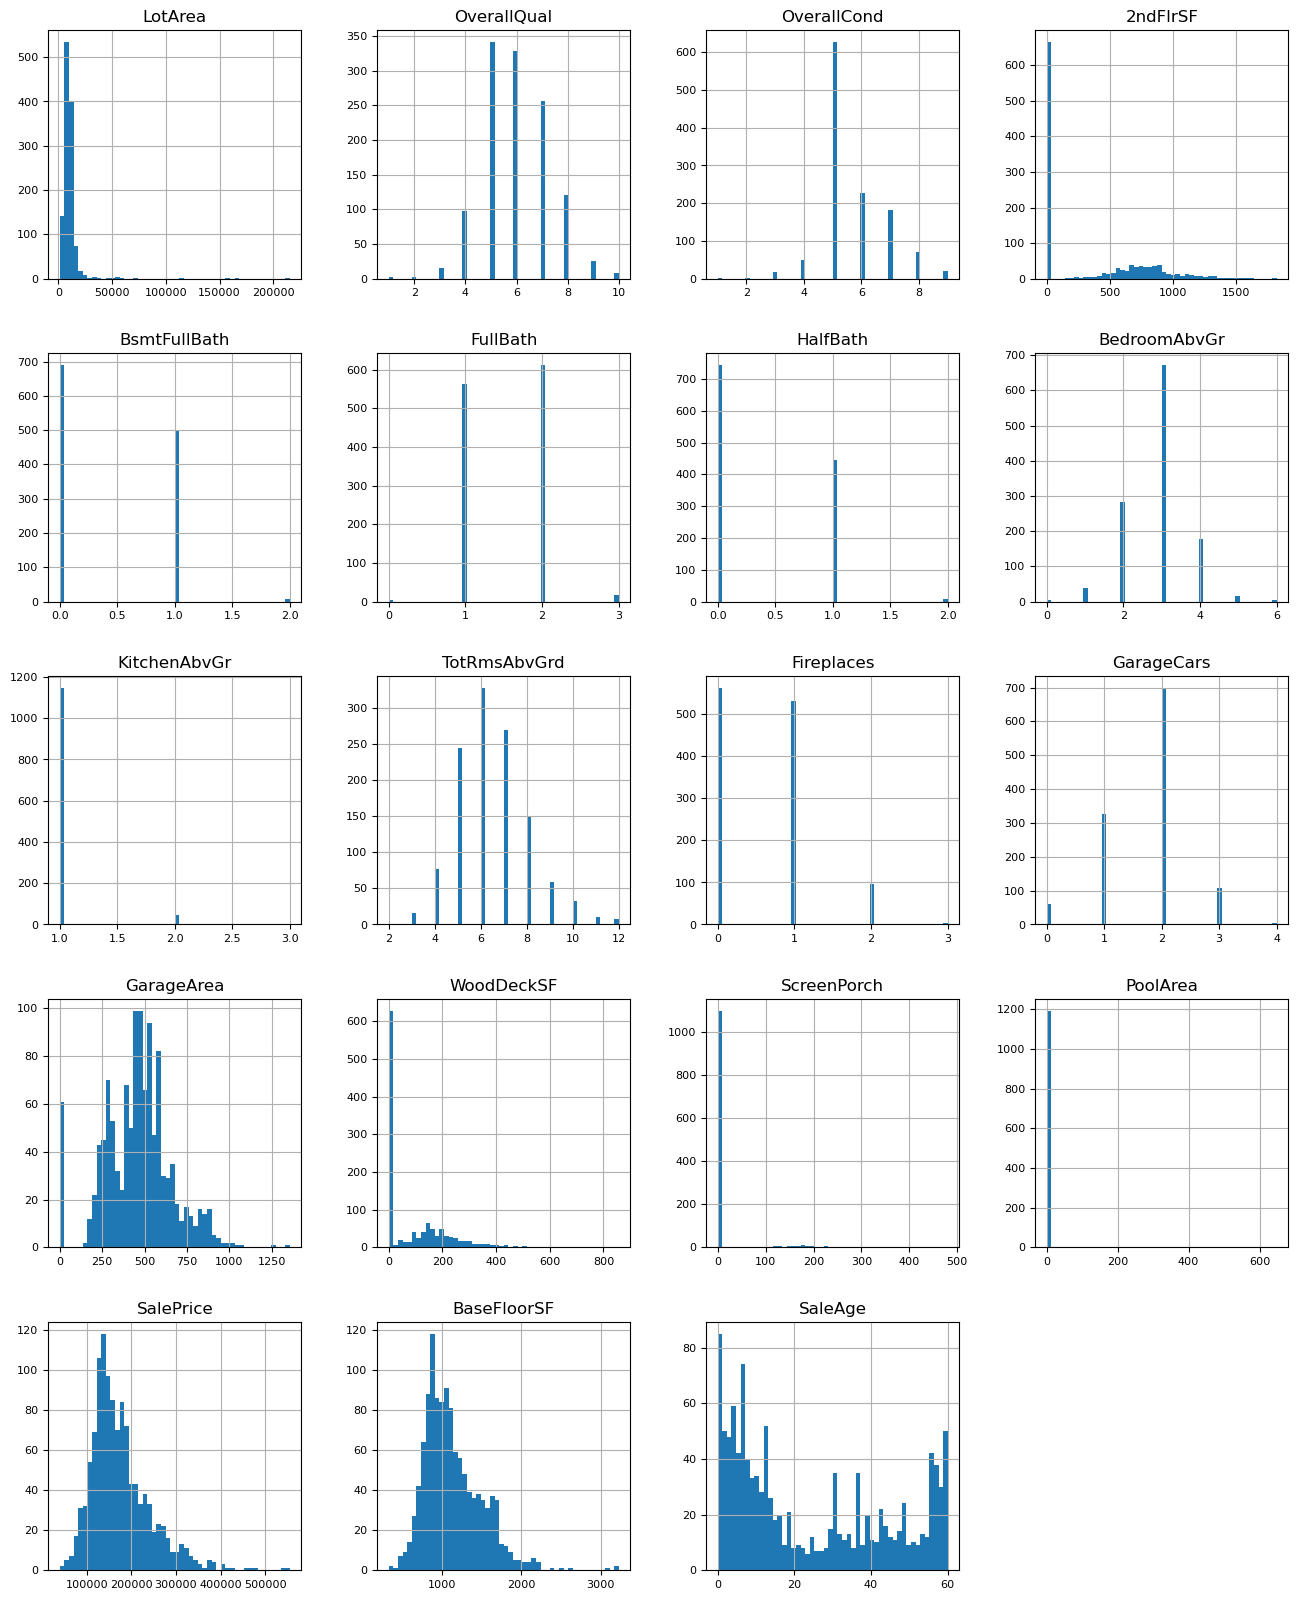

In [26]:
# numeric features distribution

num_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [27]:
# sns.pairplot(data[["SalePrice"] + num_columns])

### Categorical features


In [28]:
cat_data = data.select_dtypes(exclude=["int64"])
cat_columns = cat_data.columns.to_list()
print(cat_columns)
cat_data.head()

['MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


,MSZoning,LotFrontage,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,65.0,Pave,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,...,2003.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,80.0,Pave,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,...,1976.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,68.0,Pave,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,...,2001.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,84.0,Pave,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,...,2000.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,85.0,Pave,IR1,Lvl,Inside,Mitchel,Norm,Norm,1Fam,...,1993.0,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal


In [29]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [30]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [31]:
y = data["SalePrice"]
# X = data.drop(columns=["SalePrice"]) # uncomment to use all the features instead of only numbertic
X = data[num_columns]  # model only the numeric features.

# y_train = y
# X_train = X

# y_test = test_data["SalePrice"]
# X_test = test_data.drop(columns=["SalePrice"])

## Model


### Transform pipeline


In [32]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [33]:
# # create the drop list for the categorical data
# drop_cat = ["no" for _ in cat_columns]
# drop_cat[-1] = "unfurnished"
# drop_cat
drop_cat = []

In [34]:
# Create preprocessor

# categorical data transformer
categorical = Pipeline(
    steps=[
        (
            "encoding",
            OneHotEncoder(
                handle_unknown="ignore",
                # drop=[]
                drop="first",
            ),
        )
    ]
)

# numberical data scaling transformer
numerical = Pipeline(steps=[("scaling", StandardScaler())])

preproccesor = ColumnTransformer(
    [
        # ("categorical", categorical, cat_columns), # uncomment when using all the features
        ("numerical", numerical, num_columns)
    ]
)

model = Pipeline(
    steps=[
        ("prepocessor", preproccesor),
        (
            "regressor",
            TransformedTargetRegressor(
                regressor=LinearRegression(), transformer=MinMaxScaler()
            ),
        ),
    ]
)

### Train model


In [35]:
# Create the training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
model.fit(X_train, y_train)

Pipeline(steps=[('prepocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'OverallQual',
                                                   'OverallCond', '2ndFlrSF',
                                                   'BsmtFullBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageCars', 'GarageArea',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'PoolArea', 'BaseFloorSF',
                                                   'SaleAge'])])),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=MinMaxScaler()))])

### Test the model


In [37]:
# get prediction with test data

# y_pred = model.predict(test_data)
y_pred = model.predict(X_test)

In [38]:
# import sklean model testing methods

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error  # type: ignore

# test model using the predicted y and the test y (original not modified y)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# uses the square=False attribute to return the not squared (root)
rmse = root_mean_squared_error(
    y_test,
    y_pred,
)
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae}\nMSE: {mse}\n\nRMSE: {rmse}\nR2: {r2}")

MAE: 18529.698962577113
MSE: 725717655.1371285

RMSE: 26939.147260764
R2: 0.8579516189390353


In [39]:
num_col_with_pric = num_columns.copy()
num_col_with_pric.append("SalePrice")

In [40]:
# creates a random dictionary to use as the UI test data

from typing import Any


sample_prediction_row = data[num_col_with_pric].sample(1)
sample_idx = sample_prediction_row["SalePrice"].index[0]
print(sample_idx)
sample_prediction_row

298


,LotArea,OverallQual,OverallCond,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,ScreenPorch,PoolArea,BaseFloorSF,SaleAge,SalePrice
298,11700,6,6,702,0,1,2,3,1,7,1,2,539,224,0,0,1041,39,175000


In [41]:
print(f"Price: {sample_prediction_row['SalePrice']}")

Price: 298    175000
Name: SalePrice, dtype: int64


In [42]:
sample_prediction_row.drop(columns=["SalePrice"]).to_dict(orient="index").get(400)

In [43]:
# In this implementation the values are just number, so sample prediction is a dictionary with values
sample_prediction: dict | Any = (
    sample_prediction_row.drop(columns=["SalePrice"])
    .to_dict(orient="index")
    .get(sample_idx)
)
observation = pd.Series(sample_prediction).to_frame().T
observation

,LotArea,OverallQual,OverallCond,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,ScreenPorch,PoolArea,BaseFloorSF,SaleAge
0,11700,6,6,702,0,1,2,3,1,7,1,2,539,224,0,0,1041,39


In [44]:
# make prediction of observation


model.predict(observation)[0]

190785.42885216096

### Graph prediction


<Axes: xlabel='SalePrice'>

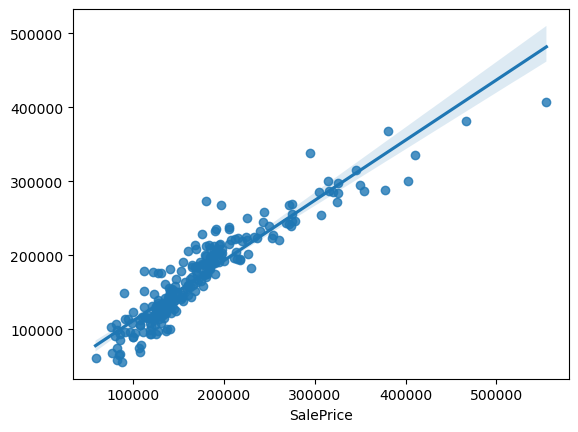

In [45]:
sns.regplot(x=y_test, y=[y_pred])

In [46]:
data[num_columns].head(1)

,LotArea,OverallQual,OverallCond,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,ScreenPorch,PoolArea,BaseFloorSF,SaleAge
0,8450,7,5,854,1,2,1,3,1,8,0,2,548,0,0,0,856,5


In [47]:
import statsmodels.api as sm

# import statsmodels.formula.api as sma

# formula = ""

smX = data[num_columns]

smX = sm.add_constant(smX)

smY = data["SalePrice"]

sum_mol = sm.OLS(smY, smX)

result = sum_mol.fit()

In [48]:
data[num_columns].sample(5)

,LotArea,OverallQual,OverallCond,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,ScreenPorch,PoolArea,BaseFloorSF,SaleAge
361,9144,5,5,517,1,1,0,3,1,8,0,1,240,0,0,0,988,26
865,8750,5,6,0,1,1,0,3,1,5,0,2,902,0,0,0,1002,39
253,9350,6,7,0,0,2,0,3,1,7,0,1,309,333,0,0,1302,16
309,12378,9,5,0,1,2,0,3,1,8,3,3,708,208,0,0,1944,2
1204,10140,5,6,0,1,1,1,3,1,6,0,2,495,0,0,0,1074,31


In [49]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     409.3
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:54:46   Log-Likelihood:                -13792.
No. Observations:                1196   AIC:                         2.762e+04
Df Residuals:                    1177   BIC:                         2.772e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.702e+04   8427.754     -5.579      0.000   -6.36e+04   -3.05e+04
LotArea          0.5839      0.073      8.022      0.000       0.441       0.727
OverallQual   1.738e+04    847.230     20.518      0.000    1.57e+04     1.9e+04
OverallCond   2604.2655    697.840      3.732      0.000    1235.117    3973.414
2ndFlrSF        40.9891      3.716     11.029      0.000      33.698      48.281
BsmtFullBath  1.407e+04   1552.638      9.063      0.000     1.1e+04    1.71e+04
FullBath      5837.2192   2120.115      2.753      0.006    1677.592    9996.846
HalfBath      6709.8894   1992.543      3.368      0.001    2800.557    1.06e+04
BedroomAbvGr -6274.0204   1370.202     -4.579      0.000   -8962.332   -3585.709
KitchenAbvGr -2.584e+04   4024.494     -6.422      0.000   -3.37e+04   -1.79e+04
TotRmsAbvGrd  1330.4789    976.340      1.363      0.173    -585.082    3246.040
Fireplaces    3341.3103   1374.414      2.431      0.015     644.735    6037.885
GarageCars    4375.9989   2287.178      1.913      0.056    -111.402    8863.400
GarageArea      30.0644      7.800      3.854      0.000      14.760      45.369
WoodDeckSF      23.2535      6.080      3.824      0.000      11.324      35.183
ScreenPorch     44.8871     13.254      3.387      0.001      18.883      70.891
PoolArea       -21.2607     24.876     -0.855      0.393     -70.067      27.545
BaseFloorSF     71.0977      3.776     18.829      0.000      63.689      78.506
SaleAge       -267.9410     46.880     -5.715      0.000    -359.919    -175.963
==============================================================================
Omnibus:                      140.879   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.665
Skew:                           0.471   Prob(JB):                    4.56e-135
Kurtosis:                       6.395   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""